# COGS 108 - Final Project 

# Overview

As a group, we wanted to dig deeper into whether or not there was any association between income inequality and the level of crime experienced in different cities in the United States. As we explored our data and applied tests to said data, we saw that there was indeed a difference in crime rates between areas that did versus did not experience income inequality. However, upon further testing, we saw that the correlation between income inequality and crime was quite weak, making income inequality a weak predictor for crime index.

# Names

- Jaclyn Chin
- Elisa Lau
- Samuel Parker
- Elise Wong
- Fiona Wong

###### Group Members IDs

- A14579160
- A12764321
- A13665511
- A13026941
- A13779845

# Research Question

We want to shed light on the effects of economic inequality on society, and see if it has any effect on crime rates. We can tackle this topic from a data science perspective by narrowing down the question a bit more. The data science question we are asking is the following:  What is the correlation between street crime and economic inequality in the US? 
    
There are some important things to note about how we defined our terms. Firstly, the kind of crime we are looking at includes forms of violent crime and street crime - things like muggings, theft, and perhaps even murder. We are not currently interested in things like speeding or white collar crime.

Secondly, we are looking at economic inequality, not poverty. While it is fairly obvious that poverty and crime are related (with desperation comes drastic measures), we are trying to tease out the effect of income inequality in and of itself. It could be that inequality contributes to the disintegration of communities and crime in a fashion that is independent from the sheer effect of poverty.  Perhaps one community might have more crime in it than another even though they both have similar levels of poverty, due to the fact that the one community has a substantial level of inequality. Indeed, it’s possible that an unequally distributed increase in wealth could catalyze an upswing in crime. This will no doubt require close inspection to properly disambiguate the effects of poverty from the effects of inequality.

## Background and Prior Work

Due to developments in our current political climate, discussion about the harms of income inequality has become increasingly prevalent. Popular politicians such as Alexandria Ocasio-Cortez and Bernie Sanders have shined the floodlights on the glaring cleft that lies between the richest Americans and the rest of us.  A quick look at the numbers will show that the divide between rich and poor is growing in this country (1). With the advent of this apparent fact, many have begun researching the various ways in which increased income inequality affects society. 

We’re not the first group of people  to investigate the relationship between crime and income inequality. According to David Luther from Zippia, in 2016, the FBI released crime rate statistics that showed correlation between city crime and income inequality (2). The study looks at FBI data about property crime and violent crime and concluded that income inequality correlates the strongest with crime compared to other variables such as unemployment, poverty, and number of high school graduates where there was only weak correlation. In this paper, the results also show that robbery and burglary in the US are strongly affected by income inequality (3). On a larger scale, this journal article also describes how violent crime and income inequality are positively correlated when looking at different countries (4).

We can add something of value to the larger conversation by getting a better idea of exactly what kinds of crime interact with economic inequality. Rather than look at an aggregate of property and violent crimes, we want to look at the specific types of crimes that might correlate with income inequality in the United States. Types of crime we are interested in investigating include assault, robbery, arson, rape, and hate crimes. In terms of income inequality, we can also look at the different types of ways that income inequality is measured to give more context to our findings. For instance, looking at the mean, median, and standard deviation of income for each location and taking into account the state Gini index (discussed more in the Data section below).

References (include links):
- 1) U.S. Income Inequality: Facts, Causes, Solutions: 

https://www.thebalance.com/income-inequality-in-america-3306190

- 2) New FBI Data Correlates City Crime to Income Inequality: 

https://www.zippia.com/advice/crime-income-inequality/

- 3) Income inequality and crime in the United States: 

https://tinyurl.com/y6t7cegl

- 4) Inequality and Violent Crime: 

https://www.jstor.org/stable/10.1086/338347?seq=1#page_scan_tab_contents

# Hypothesis


We expect to find a positive correlation between the rate of street crime and economic inequality in the US. There are news articles all over the internet that speculate about this particular correlation. It is a relationship that governments, organizations, economists, and sociologists have all studied a fair amount. In particular, as stated in the NYU Dispatch’s article “How big is income inequality as a determinant of crime rates?” from May 23, 2018, “[a] 2002 study by The World Bank found that crime rates and inequality are positively correlated, and an increase in income inequality has the effect of intensely increasing crime rates.”

# Dataset(s)

### Summary of Data and Combining
We found three datasets to help answer our question: US Household Income, US Crime, and US Gini Index. Our datasets were either web scraped from a website that has aggregated information from public records or downloaded from the US Census Bureau FactFinder. We combined the crime and household datasets by merging them based on city and state values. The Gini Index and crime datasets were also merged based on city and state.

### Household Income Dataset
- Dataset Name: economic_data.csv
- Link to the dataset: https://statisticalatlas.com/United-States/Household-Income#top
- Number of observations: 10872

The US household income data was web scraped from Statistical Atlas which uses data from the US Census Bureau, specifically the 2010 census and the 2012-2016 American Community Survey. For each city we scraped the city name, state name, percentile, income, and percent (as percentage of median household income).

#### Web Scraping for US Household Income Data

In [ ]:
"""
This script gets the URL to the page of every major city in the US. It searches by 
state.Once it collects all of those URLS, then those URLS can be fed into the 
scrape_statistical_atlast.py fileso that we can scrape up the data for every city.
Author: Samuel Parker
"""
import gzip
import bs4
import urllib.request
import pandas as pd
import pickle
import os
import re

states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
          "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho",
          "Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine",
          "Maryland","Massachusetts","Michigan", "Minnesota","Mississippi",
          "Missouri","Montana","Nebraska","Nevada","New-Hampshire","New-Jersey",
          "New-Mexico","New-York","North-Carolina","North-Dakota","Ohio",
          "Oklahoma","Oregon","Pennsylvania", "Rhode-Island","South-Carolina",
          "Tennessee","Texas","Utah","Vermont","Virginia","Washington",
          "West-Virginia","Wisconsin","Wyoming"]

url_base = 'https://statisticalatlas.com/state/'
url_list = []

for state in states:
    try:
        target_url = url_base + state + "/Overview"
        request = urllib.request.Request(
            target_url,
            headers={
                "Accept-Encoding": "gzip",
                "User-Agent": 
                "Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11",
            })
        response = urllib.request.urlopen(request)
        gzip_dec = gzip.decompress(response.read())
        print(gzip_dec)
        gzipFile = gzip.GzipFile(fileobj=response)
        gzipFile.read()

        soup = bs4.BeautifulSoup(gzip_dec,features="lxml")

        vaart_steg = soup.find_all('div', class_="info-table-contents-td col-sm-9")
        vaart_steg = vaart_steg[3]
        vaart_steg = vaart_steg.find_all('a')
        hrefs = []
        for link in vaart_steg:
            if link != None:
                hrefs.append(link['href'])

        url_list += hrefs

    except:
        print("This state didn't work :( %s" %state)

# The URL for each list was put onto a big list.
# this list was serialized / pickled out and handled by another script 
#(I have included it below)
pickle_out = open("city_hrefs","wb")
pickle.dump(url_list,pickle_out)
pickle_out.close()

"""
Bin_breaker.py file. This was used to break up a list of stuff (like h-refs)
and break it up into a certain number of chunks. This easened the task of
scraping by not needing to do it all at once.
This script would be run once
Author: Samuel Parker.
"""
import pickle

pickle_in = pickle.load(file=open("county_hrefs","rb"))

def Break_bin (breakable, bin_count, filnamn):
    storage = {}

    for number in range(bin_count):
        storage[number] = []

    count = 0
    overLength = len(breakable)
    for number in range(len(breakable)):
        storage[count].append(breakable[number])
        count += 1
        if count % bin_count == 0:
            count = 0

    totala_laengden = 0
    count = 0
    for key in storage:
        stycket = storage[key]
        totala_laengden += len(stycket)
        pickle_out = open( (filnamn+str(count)), 'wb')
        pickle.dump(stycket, pickle_out)
        pickle_out.close()
        count += 1

    assert totala_laengden == overLength
    
Break_bin(pickle_in,8,"scrape_assignment")

""""
    scrape_statistical_atlas.py file.
    This file was used to scrape data about houssehold income
     off of statisticalatlas.com

     This script would be run once for each scraping assignment
     that I created using the binbreaker earlier. In our case,
     we had it run 8 times.

     Author: Samuel Parker
     Approximate date of use: Spring 2019
"""
# Importing libraries.
import gzip
import bs4
import urllib.request
import pandas as pd
import pickle
import os
import time

url_base = 'https://statisticalatlas.com'

## I had broken up the scraping assignments up in the binbreaker. 
##That we don't have to scrape literally all of the data at once.
pickle_in = pickle.load(file=open("scrape_assignment7","rb"))

for k in pickle_in:
    print(k)

URLZ = []
Allting = {}

for pickled in pickle_in:
    ny_straeng = pickled[:len(pickled)-8]
    ny_straeng = ny_straeng + "Household-Income"
    ny_straeng =  url_base + ny_straeng
    URLZ.append(ny_straeng)

for straeng in URLZ:
    ## Using a try-catch block, so one exception doesn't 
    ## jeopardize the whole operation.
    try:
        print(straeng)
        request = urllib.request.Request(
            straeng,
            headers={
                "Accept-Encoding": "gzip",
                "User-Agent": 
                "Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11",
            })
        response = urllib.request.urlopen(request)
        gzip_dec = gzip.decompress(response.read())
        print(gzip_dec)
        gzipFile = gzip.GzipFile(fileobj=response)
        gzipFile.read()

        soup = bs4.BeautifulSoup(gzip_dec,features="lxml")

        vaart_steg = soup.body
        vaart_steg = vaart_steg.find("div",class_="figure-container",
                                     id="figure/household-income-percentiles")
        vaart_steg = vaart_steg.find("div", class_="figure-contents")
        vaart_steg = vaart_steg.find("svg")

        contents = vaart_steg.find_all("g")
        contents = [a.text for a in contents]

        Allting[straeng] = contents
        print(type(Allting))
        time.sleep(1)
        
    ## Handling exceptions
    except Exception as e:
        print(ny_straeng + " didn't work")
        print(e)

     #Saving it
filnamn = 'allting_scraped8'
pickle_out = open(filnamn,'wb')
print(type(Allting))
pickle.dump(Allting,pickle_out)
pickle_out.close()

"""
    remerge.py file. This file was used to merge back together chunks 
    of scraped data.During the scraping process, I decided to scrape 
    one eighth of all of the cities or counties at a time, and in this 
    file, that sraped data gets put back together.
    Author: Samuel Parker
"""
import pandas
import pickle
pickle_in = pickle.load(file=open("city_hrefs","rb"))

url_base = 'https://statisticalatlas.com'
URLZ = []

for pickled in pickle_in:
    ny_straeng = pickled[:len(pickled)-8]
    ny_straeng = ny_straeng + "Household-Income"
    ny_straeng =  url_base + ny_straeng
    URLZ.append(ny_straeng)
    
HuvudOrdBoken = {}

dic1 = pickle.load(file=open("allting_scraped1","rb"))
dic2 = pickle.load(file=open("allting_scraped2","rb"))
dic3 = pickle.load(file=open("allting_scraped3","rb"))
dic4 = pickle.load(file=open("allting_scraped4","rb"))
dic5 = pickle.load(file=open("allting_scraped5","rb"))
dic6 = pickle.load(file=open("allting_scraped6","rb"))
dic7 = pickle.load(file=open("allting_scraped7","rb"))
dic8 = pickle.load(file=open("allting_scraped8","rb"))

# swedish for  word-books list , e.g. dictionary list
ordboksLista = [dic1,dic2,dic3,dic4,dic5,dic6,dic7,dic8]

for underOrdbok in ordboksLista:
    for nyckel in underOrdbok:
        HuvudOrdBoken[nyckel] = underOrdbok[nyckel]

# At this point, we have a dictionary full of entries 
# that contain all of our data.
pickle_out = open("remerged_data_county","wb")
pickle.dump(HuvudOrdBoken,pickle_out)
pickle_out.close()

"""
This file takes in the data that has been freshly scraped, and spits it out 
into a CSV. The CSV would still be in need of more preprocessing, however. 
But this is a first step.
"""
import pickle
import pandas as pd
import numpy as np
import os

percentiles = ["95th","80th","60th","Median","40th","20th"]
pickle_in = pickle.load(file=open("remerged_data_county","rb"))
data_ramar = []
for nyckel in pickle_in:
    try:
        place = []
        income = []
        percent = []
        namn_rad = []
        contents = pickle_in[nyckel]
        data_ram = pd.DataFrame(columns=['place', 'percentile', 
                                         'income', 'percent'])

        for a in contents:
            if "Percentile" in a or "Median" in a:
                #percentiles.append(a)
                pass
            elif "$" in a:
                income.append(pd.Series(a.split('$')[1]))
            elif "%" in a:
                percent.append(pd.Series(a.split("%")[0]))
            namn_rad.append(nyckel)

        income = income[1:]
        namn_rad = namn_rad[:6]
        income = pd.Series(income)
        percent = pd.Series(percent)
        percentile = pd.Series(percentiles)
        namn_rad = pd.Series(namn_rad)
        data_ram.income = income
        data_ram.percent = percent
        data_ram.percentile = percentiles
        data_ram.place = namn_rad
        data_ramar.append(data_ram)
    except:
        print("This gave us trouble: ")
        print(nyckel)

oever_dr = pd.concat(data_ramar)

oever_dr.to_csv("income_county.csv")

print(oever_dr)

### US Crime Dataset
- Dataset Name: UScrime_scraped.csv
- Link to the dataset: http://www.city-data.com/crime/index.html
- Number of observations: 9865

The data on US city crime was web scraped from City-Data which uses data from public records and agencies. Data for 9865 cities was scraped and 19 features for each city were collected (city, state, murders, rapes, burglarys, assaults, crime index, and more). There are total numbers of crimes committed per city, crimes per 100,000 population, and a crime index which is a value that gives more weight to certain crimes (for instance murder is weighted more heavliy than assault).

#### Web Scraping for US Crime Data

In [ ]:
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re
import time
import random

# Create empty arrays to fill with data
city = []
state = []
murders = []
murdersper = []
rapes = []
rapesper = []
robberies = []
robberiesper = []
assaults = []
assaultsper = []
burglaries = []
burglariesper = []
thefts = []
theftsper = []
auto_thefts = []
auto_theftsper = []
arsons = []
arsonsper = []
crime_index = []

# Array for city links while scraping each state
links = []

# No crime data for Hawaii
# States with only one link
states = ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'Colorado', 'Connecticut',
          'Delaware', 'Iowa', 'Idaho','Indiana', 'Kansas', 'Kentucky', 'Louisiana',
          'Maine', 'Maryland', 'Massachusetts',  'Minnesota', 'Mississippi',  
          'Montana', 'Nebraska', 'Nevada', 'New-Hampshire',  'New-Mexico', 
          'North-Carolina', 'North-Dakota',  'Oklahoma', 'Oregon','Rhode-Island',
          'South-Carolina', 'South-Dakota', 'Tennessee','Utah','Vermont', 
          'Virginia', 'Washington', 'West-Virginia', 'Wyoming']

# States with multiple links
multstates = ['California', 'California2','Florida' , 'Florida2','Georgia', 
              'Georgia2', 'Illinois','Illinois2', 'Illinois3', 'Illinois4' ,
              'Michigan', 'Michigan2', 'Missouri', 'Missouri2','New-Jersey', 
              'New-Jersey2', 'New-York', 'New-York2','Ohio', 'Ohio2', 
              'Pennsylvania','Pennsylvania2', 'Pennsylvania3', 'Texas',
              'Texas2', 'Texas3', 'Wisconsin', 'Wisconsin2']

# Loop through all of the states (this was done in two parts 
# with states and multstates)
for currstate in multstates:
    # Make a get request
    response = rq.get('http://www.city-data.com/crime/crime-' + 
                      currstate + '.html', proxies=proxies)

    # Get the html for the state page
    page_html = bsoup(response.text, 'html.parser')

    # Get the names for all of the cities and put them into a list
    lstcities = page_html.find(id = 'content')
    list(lstcities.children)
    lstref = list(lstcities.children)[7]
    list(lstref.children)

    # Create list with all html links for each city
    for link in lstref.find_all('a'):
        links.append(link.get('href'))

for citylink in links:
    # Make a get request
    cityresponse = rq.get('http://www.city-data.com/crime/' + citylink)
    # Sleep for a random time between loops so website does not get spammed
    time.sleep(random.randint(8,15))
    
    # Get the html for the city and find the crime data we want (types of 
    # crime, crime per 100k people, crime index)
    crimesoup = bsoup(cityresponse.text, 'html.parser')
    crimehtml = list(crimesoup.children)[2]
    crimebody = list(crimehtml.children)[3]
    crimeol = list(crimebody.children)[9] 
    crimeli = list(crimeol.children)[9]

    # Get city and state name
    citystate = crimeli.get_text()
    citystate = citystate.split(',')
    citya = citystate[0]
    currcity = citya.replace('Crime rate in ', '')
    city.append(currcity)
    statea = citystate[1]
    stateb = statea.split('(')
    state.append(stateb[0].strip())
    
    # Find the crime table
    table = crimesoup.find(id="crimeTab")
    b = list(table.children)[5]
    
    # Find murder numbers
    murd = list(b.children)[1]
    c = 0
    for i in list(murd.children):
        c = c+1
    murdnum = list(murd.children)[c-1]

    # Find numbers for total murders in 2017 and murders per 100,000 people
    d = 0
    for j in list(murdnum.children):
        d = d+1
    if (d == 1):
        murders.append(float('NaN'))
        murdersper.append(float('NaN'))
    else:
        murdtotal = int(list(murdnum.children)[0].replace(',', ''))
        murdper = list(list(murdnum.children)[2])[0]
        murdper = murdper[1:]
        murdper = float(murdper[:-1].replace(',', ''))
        murders.append(murdtotal)
        murdersper.append(murdper)

    # Get rape numbers
    ra = list(b.children)[3]
    ranum = list(ra.children)[c-1]
    d = 0
    for j in list(ranum.children):
        d = d+1
    if (d == 1):
        rapes.append(float('NaN'))
        rapesper.append(float('NaN'))
    else:
        # Get numbers for total rapes in 2017 and rapes per 100,000 people
        ratotal = int(list(ranum.children)[0].replace(',', ''))
        raper = list(list(ranum.children)[2])[0]
        raper = raper[1:]
        raper = float(raper[:-1].replace(',', ''))
        rapes.append(ratotal)
        rapesper.append(raper)
    
    # Get robbery numbers
    rob = list(b.children)[5]
    robnum = list(rob.children)[c-1]
    
    d = 0
    for j in list(robnum.children):
        d = d+1
    if (d == 1):
        robberies.append(float('NaN'))
        robberiesper.append(float('NaN'))
    else:
        # Get numbers for total robberies in 2017 and robberies per 100,000 people
        robtotal = int(list(robnum.children)[0].replace(',', ''))
        robper = list(list(robnum.children)[2])[0]
        robper = robper[1:]
        robper = float(robper[:-1].replace(',', ''))
        robberies.append(robtotal)
        robberiesper.append(robper)
        
    # Get assault numbers
    assau = list(b.children)[7]
    assaunum = list(assau.children)[c-1]
    d = 0
    for j in list(assaunum.children):
        d = d+1
    if (d == 1):
        assaults.append(float('NaN'))
        assaultsper.append(float('NaN'))
    else:
        # Get numbers for total assaults in 2017 and assaults per 100,000 people
        assautotal = int(list(assaunum.children)[0].replace(',', ''))
        assauper = list(list(assaunum.children)[2])[0]
        assauper = assauper[1:]
        assauper = float(assauper[:-1].replace(',', ''))
        assaults.append(assautotal)
        assaultsper.append(assauper)
    
    # Get burlgary numbers
    bur = list(b.children)[9]
    burgnum = list(bur.children)[c-1]
    d = 0
    for j in list(burgnum.children):
        d = d+1
    if (d == 1):
        burglaries.append(float('NaN'))
        burglariesper.append(float('NaN'))
    else:
        # Get numbers for total burglaries in 2017 and burglaries per 100,000 people
        burgtotal = int(list(burgnum.children)[0].replace(',', ''))
        burgper = list(list(burgnum.children)[2])[0]
        burgper = burgper[1:]
        burgper = float(burgper[:-1].replace(',', ''))
        burglaries.append(burgtotal)
        burglariesper.append(burgper)
        
    # Get theft numbers
    thef = list(b.children)[11]
    theftnum = list(thef.children)[c-1]
    d = 0
    for j in list(theftnum.children):
        d = d+1
    if (d == 1):
        thefts.append(float('NaN'))
        theftsper.append(float('NaN'))
    else:
        # Get numbers for total thefts in 2017 and thefts per 100,000 people
        thefttotal = int(list(theftnum.children)[0].replace(',', ''))
        theftper = list(list(theftnum.children)[2])[0]
        theftper = theftper[1:]
        theftper = float(theftper[:-1].replace(',', ''))
        thefts.append(thefttotal)
        theftsper.append(theftper)
        
    # Get auto theft numbers
    authef = list(b.children)[13]
    autotheftnum = list(authef.children)[c-1]
    d = 0
    for j in list(autotheftnum.children):
        d = d+1
    if (d == 1):
        auto_thefts.append(float('NaN'))
        auto_theftsper.append(float('NaN'))
    else:
        # Get numbers for total auto thefts in 2017 and auto thefts per 100,000 people
        autothefttotal = int(list(autotheftnum.children)[0].replace(',', ''))
        autotheftper = list(list(autotheftnum.children)[2])[0]
        autotheftper = autotheftper[1:]
        autotheftper = float(autotheftper[:-1].replace(',', ''))
        auto_thefts.append(autothefttotal)
        auto_theftsper.append(autotheftper)
    
    # Get arson numbers
    ar = list(b.children)[15]
    arsonnum = list(ar.children)[c-1]
    d = 0
    for j in list(arsonnum.children):
        d = d+1
    if (d == 1):
        arsons.append(float('NaN'))
        arsonsper.append(float('NaN'))
    else:
        # Get numbers for total arsons in 2017 and arsons per 100,000 people
        arsontotal = int(list(arsonnum.children)[0].replace(',', ''))
        arsonper = list(list(arsonnum.children)[2])[0]
        arsonper = arsonper[1:]
        arsonper = float(arsonper[:-1].replace(',', ''))
        arsons.append(arsontotal)
        arsonsper.append(arsonper)
    
    # Get crime index numbers
    cind = list(b.children)[17]
    cindnum = list(cind.children)[0]
    d = 0
    for j in list(cindnum.children):
        d = d+1
    crate = list(cindnum.children)[d-1]
    crimeind = float(list(crate.children)[0])
    crime_index.append(crimeind)

# Create a dataframe with all of the crime data collected
crime = pd.DataFrame({
        'city': city,
        'state': state,
        'murders': murders,
        'murdersper100k': murdersper,
        'rapes': rapes,
        'rapesper100k': rapesper,
        'robberies': robberies,
        'robberiesper100k': robberiesper,
        'assaults': assaults,
        'assaultsper100k': assaultsper,
        'burglaries': burglaries,
        'burglariesper100k': burglariesper,
        'thefts': thefts,
        'theftsper100k': theftsper,
        'autothefts': auto_thefts,
        'autotheftsper100k': auto_theftsper,
        'arson': arsons,
        'arsonper100k': arsonsper,
        'crime index': crime_index
    })
crime

# Export the crime dataframe as a csv file
crime.to_csv('crime_scrapingmultstates4.csv')

### Gini Index Dataset

- Dataset Name: city_gini_index.csv
- Link to the dataset: https://tinyurl.com/yxtoebgb
- Number of observations: 3573

The Gini Index Dataset was downloaded from American Fact Finder which allows users to search data colleted by the United States Census Bureau. The data is from the 2017 American Community Survey and it has 3573 cities with their ID, location, estimated Gini Index, and margin of error. The Gini Index dataset is used as supporting data to the household income dataset.

# Setup

In [1]:
# Import libraries
import re
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn import preprocessing

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 10

# Data Cleaning

In [2]:
# Load crime data
df_crime = pd.read_csv('UScrime_scraped.csv')
# Drop unnecessary extra index column
df_crime.drop(columns = ['Unnamed: 0'], inplace = True)
df_crime

,city,state,murders,murdersper100k,rapes,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,Abbeville,Alabama,0.0,0.0,2.0,...,6.0,231.7,NaN,NaN,265.3
1,Adamsville,Alabama,1.0,23.1,1.0,...,15.0,346.1,NaN,NaN,468.4
2,Addison,Alabama,0.0,0.0,0.0,...,2.0,271.0,NaN,NaN,117.9
...,...,...,...,...,...,...,...,...,...,...,...
9862,Torrington,Wyoming,0.0,0.0,0.0,...,3.0,44.6,0.0,0.0,91.5
9863,Wheatland,Wyoming,0.0,0.0,0.0,...,7.0,194.3,0.0,0.0,117.2
9864,Worland,Wyoming,0.0,0.0,2.0,...,3.0,56.7,0.0,0.0,118.4


First, let's look at the income data

In [3]:
# Load income data
df_income = pd.read_csv('economic_data.csv')
# Drop unnecessary extra index column
df_income.drop(columns = ['Unnamed: 0'], inplace = True)
df_income

,place,percentile,income,percent
0,https://statisticalatlas.com/place/Alabama/Ala...,95th,"0 177,359.000000\rdtype: object",0 241.881\rdtype: object
1,https://statisticalatlas.com/place/Alabama/Ala...,80th,"0 122,176.000000\rdtype: object",0 166.623\rdtype: object
2,https://statisticalatlas.com/place/Alabama/Ala...,60th,"0 85,277.000000\rdtype: object",0 116.300\rdtype: object
...,...,...,...,...
10869,https://statisticalatlas.com/place/Wyoming/Pow...,Median,"0 46,971.000000\rdtype: object",0 100.000\rdtype: object
10870,https://statisticalatlas.com/place/Wyoming/Pow...,40th,"0 40,583.000000\rdtype: object",0 86.400\rdtype: object
10871,https://statisticalatlas.com/place/Wyoming/Pow...,20th,"0 23,336.000000\rdtype: object",0 49.682\rdtype: object


After loading the crime data and the income data, it was necessary for us to extract the city and state within the url in the place column of our income df. Then we reordered the columns, and cleaned up the dataframe to match up with the city and state columns in our crime data's csv. 

In [4]:
# Extract city and state from url
df_income['citystate'] = df_income['place'].str.extract("place/(.*)/")
# Extract state
df_income['state'] = df_income['citystate'].str.extract("(.*)/")
# Extract city
df_income['city'] = df_income['citystate'].str.extract("/(.*)")
# Remove place and citystate columns
df_income = df_income.drop(['place', 'citystate'], axis=1)
# Reorder columns
df_income = df_income[['city', 'state', 'percentile', 'income', 'percent']]
# Remove zeroes in income and percent columns
df_income['income'] = df_income['income'].replace({'0 ':''}, regex = True)
df_income['percent'] = df_income['percent'].replace({'0 ':''}, regex = True)
df_income

,city,state,percentile,income,percent
0,Alabaster,Alabama,95th,"177,359.000000\rdtype: object",241.881\rdtype: object
1,Alabaster,Alabama,80th,"122,176.000000\rdtype: object",166.623\rdtype: object
2,Alabaster,Alabama,60th,"85,277.000000\rdtype: object",116.300\rdtype: object
...,...,...,...,...,...
10869,Powell,Wyoming,Median,"46,971.000000\rdtype: object",100.000\rdtype: object
10870,Powell,Wyoming,40th,"40,583.000000\rdtype: object",86.400\rdtype: object
10871,Powell,Wyoming,20th,"23,336.000000\rdtype: object",49.682\rdtype: object


Then, the income column & percentile column are cleaned up to be changed into ints, so we could pivot the data, making each percentile (20th, 40th, etc.) into a column and organizing our data more aesthetically and usefully.

In [5]:
# Convert income to int
pd.options.mode.chained_assignment = None 
for i in range(0, len(df_income)):
    incomeConvert = df_income['income'][i]
    incomeConvert = incomeConvert[:(incomeConvert.find("."))]
    incomeConvert = incomeConvert.replace(',', "")
    incomeConvert = re.sub(r"^\s+", "", incomeConvert, flags=re.UNICODE)
    
    incomeConvert = int(float(incomeConvert))
    df_income['income'][i] = incomeConvert   

# Drop 'percent' column
# Make percentile columns 20th, 40th, Median, 60th, 80th, 95th
df_percentile = df_income.pivot_table(index=["state","city"], 
                                      columns='percentile', 
                                      values=['income'], aggfunc='first')
df_percentile.columns = df_percentile.columns.droplevel()
df_percentile = df_percentile.reset_index()
df_percentile.columns=df_percentile.columns.tolist()
df_percentile = df_percentile[['city','state','20th','40th','Median',
                               '60th','80th','95th']]
df_percentile

,city,state,20th,40th,Median,60th,80th,95th
0,Alabaster,Alabama,33578,61734,73325,85277,122176,177359
1,Albertville,Alabama,17270,27280,32042,43119,73798,128375
2,Alexander-City,Alabama,13295,23247,30442,38488,65625,133750
...,...,...,...,...,...,...,...,...
1567,Sheridan,Wyoming,20786,37456,48804,61526,95356,152329
1568,Torrington,Wyoming,18806,36662,41959,50048,86015,154477
1569,Worland,Wyoming,20148,32634,39904,52766,80107,165486


In [6]:
# Create inequality column: 95th minus 20th
inequality = [0]*len(df_percentile)
for i in range(0,len(df_percentile)):
    inequality[i] = df_percentile['95th'][i] - df_percentile['20th'][i]

df_percentile['income inequality'] = inequality  
df_percentile

,city,state,20th,40th,Median,60th,80th,95th,income inequality
0,Alabaster,Alabama,33578,61734,73325,85277,122176,177359,143781
1,Albertville,Alabama,17270,27280,32042,43119,73798,128375,111105
2,Alexander-City,Alabama,13295,23247,30442,38488,65625,133750,120455
...,...,...,...,...,...,...,...,...,...
1567,Sheridan,Wyoming,20786,37456,48804,61526,95356,152329,131543
1568,Torrington,Wyoming,18806,36662,41959,50048,86015,154477,135671
1569,Worland,Wyoming,20148,32634,39904,52766,80107,165486,145338


After cleaning the data, we could then merge the two dataframes using the city and state columns that appeared in both.

In [7]:
crime_income_df = pd.merge(df_percentile, df_crime, on=['city','state'])
crime_income_df

,city,state,20th,40th,Median,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,Alabaster,Alabama,33578,61734,73325,...,21.0,63.2,NaN,NaN,115.9
1,Albertville,Alabama,17270,27280,32042,...,90.0,416.9,NaN,NaN,200.0
2,Anniston,Alabama,12553,22337,30539,...,110.0,501.0,NaN,NaN,1302.8
...,...,...,...,...,...,...,...,...,...,...,...
921,Sheridan,Wyoming,20786,37456,48804,...,20.0,110.9,2.0,11.1,101.1
922,Torrington,Wyoming,18806,36662,41959,...,3.0,44.6,0.0,0.0,91.5
923,Worland,Wyoming,20148,32634,39904,...,3.0,56.7,0.0,0.0,118.4


Now we want to add in quintile ratios to get a better measure of income inequality. This index of inequality will be the 80th percentile's value divided by the 20th percentile's value. This is known as the Quintile Share, and the EU uses this to monitor income distribution in countries.(According to source). 
# add source! sam

In [8]:
# Zipping the quintiles together so they're easy to digest in a function. 
quintile_values = list(zip(list(crime_income_df['20th']),
                           list(crime_income_df['80th'])))
# iterate through the tuples, creating the quintile share. 
# Then, appending that to a list, which will become our quintile ratio column.
quintile_share = []
for i in range(len(quintile_values)):
    val = quintile_values[i][1] / quintile_values[i][0]
    quintile_share.append(val)
crime_income_df["quintile share"] = pd.Series(quintile_share)

crime_income_df.head()

,city,state,20th,40th,Median,...,autotheftsper100k,arson,arsonper100k,crime index,quintile share
0,Alabaster,Alabama,33578,61734,73325,...,63.2,NaN,NaN,115.9,3.638573
1,Albertville,Alabama,17270,27280,32042,...,416.9,NaN,NaN,200.0,4.273191
2,Anniston,Alabama,12553,22337,30539,...,501.0,NaN,NaN,1302.8,5.215646
3,Athens,Alabama,16777,33804,45920,...,46.1,NaN,NaN,140.2,6.247660
4,Auburn,Alabama,10718,26433,38912,...,155.8,NaN,NaN,217.4,9.969491


Now we want to look at the Gini index data.

In [9]:
# Import city gini index data
gini_index_df = pd.read_csv('city_gini_index.csv', encoding='latin-1', header = 1)
# Drop the two ID columns which will not be used
gini_index_df = gini_index_df.drop(columns = ['Id', 'Id2'])
gini_index_df

,Geography,Estimate; Gini Index,Margin of Error; Gini Index
0,"Abbeville, LA Urban Cluster (2010)",0.4608,0.0214
1,"Abbeville, SC Urban Cluster (2010)",0.5020,0.0415
2,"Abbotsford, WI Urban Cluster (2010)",0.4354,0.0507
...,...,...,...
3570,"Zimmerman, MN Urban Cluster (2010)",0.3583,0.0465
3571,"Zumbrota, MN Urban Cluster (2010)",0.4219,0.0342
3572,"Zuni Pueblo, NM Urban Cluster (2010)",0.4493,0.0465


First we want to separate the values in the Geography column into a city and state column so we can merge it easily with the crime dataframe. Then we want to convert the abbreviation for each state into it's full name so it is in the same format as the crime dataframe state column.

In [10]:
# Create empty arrays for new columns city and state
city = []
state = []
# Loop through the gini index dataframe and convert the 
# state name to its abbreviation
for citystate in gini_index_df.iterrows():
    strcity = str(citystate[1][0])
    
    # Get the city and state name
    cityname = strcity.split(',')[0].strip()
    splitcity = cityname.split('--')
    if (len(splitcity) > 1):
        cityname = splitcity[1]
    else:
        cityname = splitcity[0]
    statename = strcity.split(',')[1].strip()
    newstate = statename.split(' ')[0].strip()
    city.append(cityname)
    state.append(newstate)

# Drop the old geography column and add the city and state columns
gini_index_df['city'] = city
gini_index_df['state'] = state
gini_index_df.drop(columns = ['Geography'], inplace = True)

# Dictionary used to convert the state name to its abbreviation
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

newcol = []
# Loop through the gini index dataframe and convert 
# the state name to its abbreviation
for strstate in gini_index_df.iterrows():
    # Get the state name abbreviation
    currstate = str(strstate[1][3]).split('--')
    if (len(currstate) > 1):
        currstate = currstate[1]
    else:
        currstate = currstate[0]
    currstate = currstate.strip()

    # Search through the dictionary for the abbreviation and 
    # change it to the full state name
    for stateabbrev, state in us_state_abbrev.items():
        if currstate == stateabbrev:
            newcol.append(state)
            
# Replace the old state column with the long form state column
gini_index_df['state'] = newcol
gini_index_df

,Estimate; Gini Index,Margin of Error; Gini Index,city,state
0,0.4608,0.0214,Abbeville,Louisiana
1,0.5020,0.0415,Abbeville,South Carolina
2,0.4354,0.0507,Abbotsford,Wisconsin
...,...,...,...,...
3570,0.3583,0.0465,Zimmerman,Minnesota
3571,0.4219,0.0342,Zumbrota,Minnesota
3572,0.4493,0.0465,Zuni Pueblo,New Mexico


Now we want to remove any outliers by their Gini index and crime index to make sure that analysis is not weighting them in our analysis.

In [11]:
# Remove Gini index outliers based on 3 standard 
# deviations from the mean and z score
outliersgini=[]
indexesgini = []
threshold=3
mean_gini = np.mean(gini_index_df['Estimate; Gini Index'])
std_gini =np.std(gini_index_df['Estimate; Gini Index'])

for i in gini_index_df.iterrows():
    gini = i[1][0]
    indexgini = i[0]
    z_scoregini= (gini - mean_gini)/std_gini 
    if np.abs(z_scoregini) > threshold:
        outliersgini.append(gini)
        indexesgini.append(indexgini)

# Drop the outliers from the dataframe
gini_index_df.drop(index=indexesgini, inplace = True)
gini_index_df.shape

# Do the same for the crime index values
outliers=[]
indexes = []
threshold=3
mean_1 = np.mean(df_crime['crime index'])
std_1 =np.std(df_crime['crime index'])

for i in df_crime.iterrows():
    crime = i[1][18]
    index = i[0]
    z_score= (crime - mean_1)/std_1 
    if np.abs(z_score) > threshold:
        outliers.append(crime)
        indexes.append(index)

df_crime.drop(index=indexes, inplace = True)
df_crime

,city,state,murders,murdersper100k,rapes,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,Abbeville,Alabama,0.0,0.0,2.0,...,6.0,231.7,NaN,NaN,265.3
1,Adamsville,Alabama,1.0,23.1,1.0,...,15.0,346.1,NaN,NaN,468.4
2,Addison,Alabama,0.0,0.0,0.0,...,2.0,271.0,NaN,NaN,117.9
...,...,...,...,...,...,...,...,...,...,...,...
9862,Torrington,Wyoming,0.0,0.0,0.0,...,3.0,44.6,0.0,0.0,91.5
9863,Wheatland,Wyoming,0.0,0.0,0.0,...,7.0,194.3,0.0,0.0,117.2
9864,Worland,Wyoming,0.0,0.0,2.0,...,3.0,56.7,0.0,0.0,118.4


In [12]:
# Merge gini index dataframe with crime dataframe using the county_name columns
crime_gini_df = pd.merge(gini_index_df, df_crime, on=['city', 'state'])
crime_gini_df.shape

(2768, 21)

At the end of our data cleaning, we now now two datasets to analyze: crime_income_df and crime_gini_df. By looking at these two metrics of income inequality we can see if the results from both data sets differ or concur with our hypothesis. This will gives a better idea of how certain we are about our hypothesis or possible inconsisensies in how we define income inequality and crime in a city.

# Data Analysis & Results

### Quintile Share and Crime Analysis

We are first going to look at how quintile share, one type of way to measure income inequality, relates to crime. Let's take a quick look at the the crime and quintile share data we have by creating a pairplot.

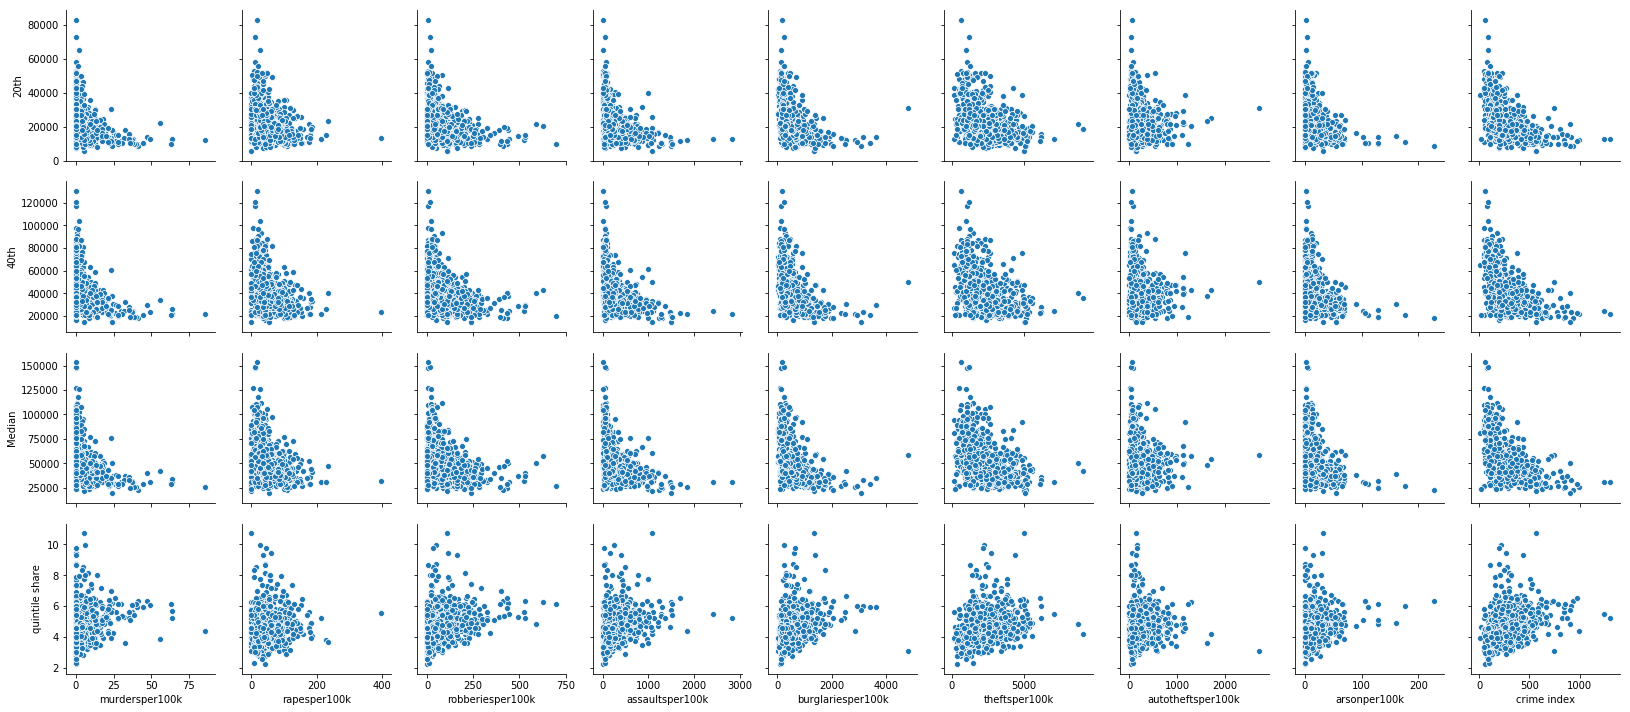

In [13]:
# Create a pair plot with income columns and crime per 100,000 based on population
sns.pairplot(crime_income_df, y_vars = ['20th', '40th', 'Median', 
                                        'quintile share'],
             x_vars = ['murdersper100k', 'rapesper100k', 'robberiesper100k', 
                       'assaultsper100k', 'burglariesper100k', 'theftsper100k',
                       'autotheftsper100k', 'arsonper100k', 'crime index'])

Visually speaking, it seems very clear that poverty connects with crime. Places with wealthier 20th percentiles have low crime, and places with poorer 20th percentiles have more crime. The same is true of the median and 40th percentiles. The relationship with the quintile share seems a little more complicated. Recall that a higher quintile share indicates a higher level of inequality. There seems to be a soft trend where the quintile share does relate to level of crime, but it is by no means a firm one.

Let's look closer at how quintile share relates to specific types of crimes per 100,000 population.

In [14]:
# Section out quintile share and specific crimes per 100,000 population
df_crimeper100 = crime_income_df[['quintile share', 'murdersper100k', 
                                  'rapesper100k', 'robberiesper100k', 
                                  'assaultsper100k','burglariesper100k', 
                                  'theftsper100k', 'autotheftsper100k', 
                                  'arsonper100k', 'crime index']]
# Create a table with their correlation
corrs_crimeper100 = df_crimeper100.corr()
corrs_crimeper100

,quintile share,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
quintile share,1.000000,0.263979,0.135648,0.341071,0.298336,0.315672,0.288744,0.073394,0.208815,0.359841
murdersper100k,0.263979,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,0.135648,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
...,...,...,...,...,...,...,...,...,...,...
autotheftsper100k,0.073394,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,0.208815,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,0.359841,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


There seems to be a fairly solid correlation here; 0.35 is certainly less correlated than some of the other values we're seeing, but it makes sense that individual types of crime per 100k would be very strongly related with the crime index, since they more or less determine it.

We will now check crime index against different percentiles (specifically 20th, Median, and 95th) of income instead of against the quintile share. This will give us an idea of how poverty in and of itself contributes to the problem.

In [15]:
# Section out 20th percentile and specific crimes per 100,000 population
df_20thper100 = crime_income_df[['20th', 'murdersper100k', 'rapesper100k', 
                                 'robberiesper100k', 'assaultsper100k',
                                 'burglariesper100k', 'theftsper100k', 
                                 'autotheftsper100k', 'arsonper100k', 
                                 'crime index']]
# Create a tablewith their correlation
corrs_20thper100 = df_20thper100.corr()
corrs_20thper100

,20th,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
20th,1.000000,-0.339197,-0.331618,-0.350650,-0.416062,-0.441973,-0.407847,-0.173704,-0.294415,-0.514839
murdersper100k,-0.339197,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,-0.331618,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
...,...,...,...,...,...,...,...,...,...,...
autotheftsper100k,-0.173704,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,-0.294415,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,-0.514839,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


The negative correlation between the 20th percentile of income against crimes per 100k is a lot stronger than simply against counts of crime. Aside from autothefts at correlation -0.173704, all the other crimes have a correlation between -0.45 and -0.29 with income's 20th percentile.

In [16]:
# Section out median income and specific crimes per 100,000 population
df_Medper100 = crime_income_df[['Median', 'murdersper100k', 'rapesper100k', 
                                'robberiesper100k', 'assaultsper100k',
                                'burglariesper100k', 'theftsper100k', 
                                'autotheftsper100k', 'arsonper100k', 
                                'crime index']]
# Create a tablewith their correlation
corrs_Medper100 = df_Medper100.corr()
corrs_Medper100

,Median,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
Median,1.000000,-0.336887,-0.342925,-0.316938,-0.412161,-0.452121,-0.408438,-0.177613,-0.286220,-0.512659
murdersper100k,-0.336887,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,-0.342925,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
...,...,...,...,...,...,...,...,...,...,...
autotheftsper100k,-0.177613,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,-0.286220,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,-0.512659,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


Once again, similar to what we saw for the 20th percentile, for the Median, there is a stronger negative correlation between income and crime per 100k than between income and just counts of crime. Against crime index, the negative correlation is -0.512659.

In [17]:
# Section out 95th percentile income and specific crimes per 100,000 population
df_95thper100 = crime_income_df[['95th', 'murdersper100k', 'rapesper100k', 
                                 'robberiesper100k', 'assaultsper100k',
                            'burglariesper100k', 'theftsper100k', 
                                 'autotheftsper100k', 'arsonper100k', 
                                 'crime index']]
# Create a tablewith their correlation
corrs_95thper100 = df_95thper100.corr()
corrs_95thper100

,95th,murdersper100k,rapesper100k,robberiesper100k,assaultsper100k,burglariesper100k,theftsper100k,autotheftsper100k,arsonper100k,crime index
95th,1.000000,-0.240329,-0.302745,-0.130805,-0.302601,-0.342421,-0.257003,-0.091805,-0.238494,-0.354678
murdersper100k,-0.240329,1.000000,0.170459,0.606552,0.571986,0.505855,0.315939,0.310346,0.386974,0.650385
rapesper100k,-0.302745,0.170459,1.000000,0.269519,0.378451,0.278477,0.278684,0.264664,0.264512,0.531987
...,...,...,...,...,...,...,...,...,...,...
autotheftsper100k,-0.091805,0.310346,0.264664,0.564758,0.334505,0.464945,0.456257,1.000000,0.296172,0.612149
arsonper100k,-0.238494,0.386974,0.264512,0.377354,0.342515,0.397116,0.288854,0.296172,1.000000,0.464297
crime index,-0.354678,0.650385,0.531987,0.762285,0.830321,0.776285,0.746923,0.612149,0.464297,1.000000


Correlation is negative once again though when we check income's 95th percentile against the crimes per 100k in the population. Against the crime index, we have a correlation of -0.354678.

As we have seen from these correlation tables, looking at just one percentile does not quite capture the idea of income inequality so we will be using the quintile share values which better takes into account the percent of income controlled by a certain portion of the population, not just the income of a percentile.

Now let's create a new column which categorizes each location as a place where there is high inequality (1) or low inequality (0). This will help determine if quintile share is a strong predictor for crime rates.

In [18]:
# Create 'ineq_exists' column: '1' if exists, '0' if doesn't
# Income inequality defined as >= median of all income inequalities
income_ineq_median = crime_income_df["quintile share"].median()

ineq_exists = [0]*len(crime_income_df)
for i in range(0,len(crime_income_df)):
    if crime_income_df["quintile share"][i] >= income_ineq_median:
        ineq_exists[i] = 1
    else:
        ineq_exists[i] = 0
crime_income_df['inequality exists'] = ineq_exists  
crime_income_df.head()

,city,state,20th,40th,Median,...,arson,arsonper100k,crime index,quintile share,inequality exists
0,Alabaster,Alabama,33578,61734,73325,...,NaN,NaN,115.9,3.638573,0
1,Albertville,Alabama,17270,27280,32042,...,NaN,NaN,200.0,4.273191,0
2,Anniston,Alabama,12553,22337,30539,...,NaN,NaN,1302.8,5.215646,1
3,Athens,Alabama,16777,33804,45920,...,NaN,NaN,140.2,6.247660,1
4,Auburn,Alabama,10718,26433,38912,...,NaN,NaN,217.4,9.969491,1


As we can see below, the distribution of crime index for the two groups of low and high income inequality are not normal so we must transform them inorder to run tests to check if there is a significant influnce income inequality has on crime.

We normalize the data by using the normalize funtion from sklearn and doing a cuberoot transformation.

The distribution of crime index for income inequality existing is not approximately normal.
The distribution of crime index for income inequality not existing is not approximately normal.


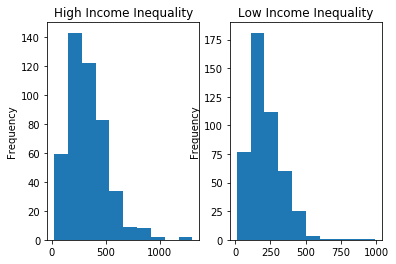

In [19]:
# Side-by-side histogram plots of crime index in 
# areas with and without income inequality
fig, axes = plt.subplots(1, 2)

crime_income_df[crime_income_df["inequality exists"] == 1]["crime index"].plot \
.hist(ax = axes[0], title = 'High Income Inequality')
crime_income_df[crime_income_df["inequality exists"] == 0]["crime index"].plot \
.hist(ax = axes[1], title = 'Low Income Inequality')
# Test if there is a normal distribution with a p test
crime_ineq = crime_income_df[crime_income_df["inequality exists"] == 1] \
["crime index"].values
crime_no_ineq = crime_income_df[crime_income_df["inequality exists"] == 0] \
["crime index"].values
st_ineq, p_ineq = normaltest(crime_ineq)
st_no_ineq, p_no_ineq = normaltest(crime_no_ineq)

is_n_ineq = bool(p_ineq > 0.01)
if is_n_ineq == True:
    print('The distribution of crime index for income inequality existing \
is approximately normal.')
else:
    print('The distribution of crime index for income inequality existing is \
not approximately normal.')
    
is_n_no_ineq = bool(p_no_ineq > 0.01)
if is_n_no_ineq == True:
    print('The distribution of crime index for income inequality not existing \
is approximately normal.')
else:
    print('The distribution of crime index for income inequality not existing \
is not approximately normal.')

The distribution of crime index for income inequality existing is approximately normal.
The distribution of crime index for income inequality not existing is approximately normal.
[0.5475311] [0.03667113]


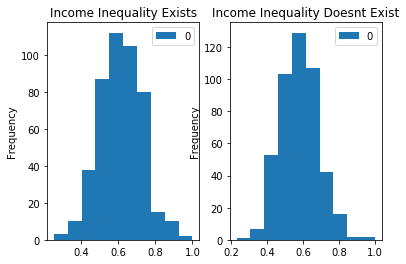

In [20]:
# Normalizing and cube root
crime_ineq = pd.Series(crime_ineq)
crime_no_ineq = pd.Series(crime_no_ineq)

crime_ineq =    pd.DataFrame(preprocessing.normalize([crime_ineq],norm='max'))
crime_ineq = crime_ineq.transpose()
crime_ineq = pd.DataFrame(np.cbrt(crime_ineq))

crime_no_ineq = pd.DataFrame(preprocessing.normalize([crime_no_ineq],norm='max'))
crime_no_ineq = crime_no_ineq.transpose()
crime_no_ineq = pd.DataFrame(np.cbrt(crime_no_ineq))

fig, axes = plt.subplots(1, 2)
crime_ineq.plot.hist(ax = axes[0], title = 'Income Inequality Exists')
crime_no_ineq.plot.hist(ax = axes[1], title = 'Income Inequality Doesn''t Exist')

# Check for normality again
st_ineq, p_ineq = normaltest(crime_ineq)
st_no_ineq, p_no_ineq = normaltest(crime_no_ineq)

is_n_ineq = bool(p_ineq > 0.01)
if is_n_ineq == True:
    print('The distribution of crime index for income inequality \
existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality \
existing is not approximately normal.')
    
is_n_no_ineq = bool(p_no_ineq > 0.01)
if is_n_no_ineq == True:
    print('The distribution of crime index for income inequality \
not existing is approximately normal.')
else:
    print('The distribution of crime index for income inequality \
not existing is not approximately normal.')
    
print(p_ineq,p_no_ineq)

Success! Now that we have approximately normal distributions, we can do some more testing.

In [21]:
# Check for significant difference
t_val, p_val = ttest_ind(crime_ineq, crime_no_ineq)
if p_val < 0.01:
    print('There is a significant difference.')
else:
    print('There is NOT a significant difference.')

There is a significant difference.


After performing a 2-sample t-test, we can conclude that there is indeed a significant difference in crime index between areas where income inequality exists and areas where income inequality doesn't exist. But maybe this effect is due to a confound, namely poverty in and of itself so we should look at poverty values.

In [22]:
# Create 'poverty_exists' column: '1' if exists, '0' if doesn't
# poverty defined as 20th percentile income < mean of all 20th 
# percentile incomes
mean20th = crime_income_df["20th"].mean()

pov_exists = [0]*len(crime_income_df)
for i in range(0,len(crime_income_df)):
    if crime_income_df["20th"][i] < mean20th:
        pov_exists[i] = 0
    else:
        pov_exists[i] = 1
crime_income_df['poverty exists'] = pov_exists 
print(len(crime_income_df[crime_income_df['poverty exists'] == 0]))
print(len(crime_income_df[crime_income_df['poverty exists'] == 1]))
crime_income_df.head()

561
363


,city,state,20th,40th,Median,...,arsonper100k,crime index,quintile share,inequality exists,poverty exists
0,Alabaster,Alabama,33578,61734,73325,...,NaN,115.9,3.638573,0,1
1,Albertville,Alabama,17270,27280,32042,...,NaN,200.0,4.273191,0,0
2,Anniston,Alabama,12553,22337,30539,...,NaN,1302.8,5.215646,1,0
3,Athens,Alabama,16777,33804,45920,...,NaN,140.2,6.247660,1,0
4,Auburn,Alabama,10718,26433,38912,...,NaN,217.4,9.969491,1,0


As we can see, based on our defintion of poverty, 561 cities do not experience poverty while 363 cities do.

Using `value_counts` from pandas, extract the number of 'poverty exists' and 'poverty doesn't exist', separately for 'income inequality exists' and 'income inequality doesn't exist'. 

To do so:

- select from `crime_income_df` income inequality, 0 and 1 separately, extract the poverty exists column, and use the `value_counts` method.
- Save the counts for each 'poverty does/doesn't exist' for 'income inequality exists' to a variable called `pov_ineq`
- Save the counts for each 'poverty does/doesn't exist' for 'income inequality doesn't exist' to a variable called `pov_no_ineq`


In [23]:
pov_ineq = crime_income_df[crime_income_df['inequality exists'] == 1] \
['poverty exists'].value_counts()
pov_no_ineq = crime_income_df[crime_income_df['inequality exists'] == 0] \
['poverty exists'].value_counts()
print(pov_ineq)
print(pov_no_ineq)

0    409
1     53
Name: poverty exists, dtype: int64
1    310
0    152
Name: poverty exists, dtype: int64


What we saw from above is that of all the areas WITH income inequality, 409 cities do not experience poverty while 53 do. Meanwhile in all the areas WITHOUT income inequality, 310 cities DO experience poverty while 152 do not. 

Let's find the ratio of poverty existing, the proportion of cities with poverty, in 'income inequality exists' and 'income inequality doesn't exist'. This will be value between 0.0 and 1.0, calculated as #(pov == 1) / (#(pov == 0) + #(pov == 1) - done separately for income inequality existing and not existing.

We will use the `pov_ineq` and `pov_no_ineq` variables to calculate these.

Save the ratio of poverty existing in 'inequality exists' to a variable `r_ineq`.

Save the ratio of poverty existing in 'inequality doesn't exist' to a variable `r_no_ineq`.

Note: keep these numbers as ratios (they should be decimal numbers, less than 1).


In [24]:
r_ineq = pov_ineq[1]/(pov_ineq[0] + pov_ineq[1])
r_no_ineq = pov_no_ineq[1]/(pov_no_ineq[0] + pov_no_ineq[1])

print(r_ineq)
print(r_no_ineq)

0.11471861471861472
0.670995670995671


The ratio of poverty existing in the two categories appear very different, but we will use a chi-squared test to see whether the difference in poverty-ratio between 'income inequality does/doesn't exist' is significantly different.

In [25]:
chisq, p_val_chi = stats.chisquare(np.array([pov_ineq.values, 
                                             pov_no_ineq.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference in ratios!')

There is a significant difference in ratios!


We will now take a look at these comparisons in pivot tables. 

We'll use the pandas `pivot_table` method to create pivot table and assign it to a variable `pv`.

We'll set the values as 'crime index', and the indices as 'poverty exists' and 'inequality exists' in the pivot table.

In [26]:
pv = pd.pivot_table(crime_income_df, values='crime index', index=[ \
'poverty exists', 'inequality exists'])
pv

crime index
poverty exists inequality exists             
0              0                   276.013158
               1                   352.225672
1              0                   186.009032
               1                   181.984906

Short recap:
- Our initial hypothesis suggested there is a significant difference between crime index of counties with and without income inequality. 
- However, further analyses suggested there may be a confounding variable, as there is also a significantly different poverty balance between cities with and without income inequality. 

Checking the average crime index, per 'inequality exists', split up by 'poverty exists', suggests there may not be a difference between 'inequality exists', other than what is explained by 'poverty exists'. 

Now we want to statistically ask this question: is there still a difference in crime index between 'inequality exists', when controlling for differences in 'poverty exists'? 

We will need to make some linear models, using Ordinary Least Squares (OLS).

We will do this using the method that is outlined in the 'LinearModels' Tutorial, using patsy, and statsmodels. 
- Create design matrices with `patsy.dmatrices`
- Iniliaize an OLS model with `sm.OLS`
- Fit the OLS model
- Check the summary for results. 

First let's only look at quintile share inequality and crime index and based on the model we create (using alpha value of 0.01), check if income inequality significantly predicts crime index.

In [27]:
# rename some columns so that dmatrices() function can be used in next step
crime_income_df.rename(columns={'crime index':'crimeindex',
                                   'inequality exists':'inequalityexists', 
                                   'poverty exists':'povertyexists',
                                    'quintile share':'quintileshare'}, 
                                   inplace=True)

# First look at how quintile share inequality affects crime index
outcome_1, predictors_1 = patsy.dmatrices('crimeindex ~ inequalityexists',
                                          crime_income_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

lm_1 = bool(res_1.pvalues[1] < 0.01)
if lm_1 == True:
    print("Income inequality significantly predicts crime index.\n")
else:
    print("Income inequality doesn't significantly predict crime index.\n") 

print(res_1.summary())

Income inequality significantly predicts crime index.

                            OLS Regression Results                            
Dep. Variable:             crimeindex   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           7.81e-29
Time:                        20:50:35   Log-Likelihood:                -5966.1
No. Observations:                 924   AIC:                         1.194e+04
Df Residuals:                     922   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Now let's look at how both poverty and quintile share inequality affect crime index. Then check if it is a significant prediction based on the same alpha value of 0.01.

In [28]:
# Look at how quintile share inequality and poverty affects crime index
outcome_2, predictors_2 = patsy.dmatrices('crimeindex ~ inequalityexists \
                                          + povertyexists', crime_income_df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

lm_2 = bool(res_1.pvalues[1] < 0.01)
if lm_1 == True:
    print("Income inequality significantly predicts crime index.\n")
else:
    print("Income inequality doesn't significantly predict crime index.\n") 

print(res_2.summary())

Income inequality significantly predicts crime index.

                            OLS Regression Results                            
Dep. Variable:             crimeindex   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.45e-46
Time:                        20:50:35   Log-Likelihood:                -5922.4
No. Observations:                 924   AIC:                         1.185e+04
Df Residuals:                     921   BIC:                         1.187e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [29]:
ans = (lm_1 == True and lm_2 == True)
if ans == True:
    print("Cities with income inequality and cities without income \n \
inequality have a systematically different crime index.")
else:
    print("Cities with income inequality and cities without income \n \
inequality don't have a systematically different crime index.")


Cities with income inequality and cities without income 
 inequality have a systematically different crime index.


# Don't know if we need this third general regression

In [30]:
# Linear regression using the continuous values for crime index and quintile share
outcome_3, predictors_3 = patsy.dmatrices('crimeindex ~ quintileshare', 
                                          crime_income_df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
lm_3 = bool(res_3.pvalues[1] < 0.01)
if lm_3 == True:
    print("Quintile Share significantly predicts crime index.\n")
else:
    print("Quintile Share doesn't significantly predict crime index.\n") 

print(res_3.summary())

Quintile Share significantly predicts crime index.

                            OLS Regression Results                            
Dep. Variable:             crimeindex   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.25e-29
Time:                        20:50:35   Log-Likelihood:                -5964.3
No. Observations:                 924   AIC:                         1.193e+04
Df Residuals:                     922   BIC:                         1.194e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

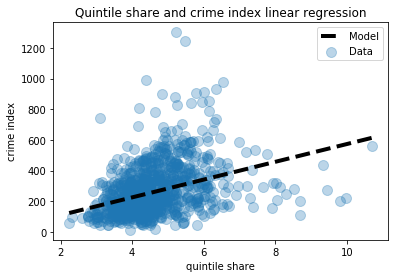

In [31]:
# Plot the orginal data (as before)
plt.scatter(crime_income_df['quintileshare'], crime_income_df['crimeindex'],
            alpha=0.3, label='Data', s=100);

# Generate and plot the model fit line
xs = np.linspace(crime_income_df['quintileshare'].min(), 
                 crime_income_df['quintileshare'].max())
ys = (57.9963 * xs) - 7.3352
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.title('Quintile share and crime index linear regression')
plt.xlabel('quintile share')
plt.ylabel('crime index')
plt.legend();
plt.show()

In [32]:
df_ineq_exists = pd.DataFrame(crime_income_df \
                            [crime_income_df['inequalityexists'] == 1])
df_no_ineq_exists = pd.DataFrame(crime_income_df \
                                 [crime_income_df['inequalityexists'] == 0])

df_ineq_ineqcrime = df_ineq_exists[['quintileshare', 'crimeindex']]
df_no_ineq_ineqcrime = df_no_ineq_exists[['quintileshare', 'crimeindex']]

corrs_ineq_ineqcrime = df_ineq_ineqcrime.corr()
corrs_no_ineq_ineqcrime = df_no_ineq_ineqcrime.corr()

corrs_ineq_ineqcrime

,quintileshare,crimeindex
quintileshare,1.000000,0.123457
crimeindex,0.123457,1.000000


In [33]:
corrs_no_ineq_ineqcrime

,quintileshare,crimeindex
quintileshare,1.000000,0.285439
crimeindex,0.285439,1.000000


There is a weak positive correlation between quintile share and crime index

# Summarize quintile share / poverty / crime index analysis

### Summary of Quintile Share Analysis
Looking at both quintile share alone as well as quintile share and poverty together, we can see that there is 

### Gini Index Analysis

Now let's look at the Gini index data, another metric of determining income inequality which represents wealth distribution. First let's check if the Gini index and crime index data are normal to see if we can immediately run tests on it.

In [34]:
# First, let us see if the Gini Index values are normal
gini = crime_gini_df['Estimate; Gini Index']
# Test to see if the gini index values are normal
st_gini, p_gini = normaltest(gini)
print(p_gini)
if p_gini > 0.01:
    print('The Gini index distribution is approximately normal.')
else:
    print('The Gini index distribution is not approximately normal.')
    
# See if the crime index values are normal
crimeindex = crime_gini_df['crime index']
# Test to see if the crime index values are normal
st_crime, p_crime = normaltest(crimeindex)
print(p_crime)
if p_crime > 0.01:
    print('The crime index distribution is approximately normal.')
else:
    print('The crime index distribution is not approximately normal.')

0.00013370632925130914
The Gini index distribution is not approximately normal.
8.454322024579447e-62
The crime index distribution is not approximately normal.


Since it is not normal, we are going to transform the data by taking a value to the power of 1/2.2 and test for normality again.

The Gini index distribution is approximately normal.
The crime index distribution is approximately normal.


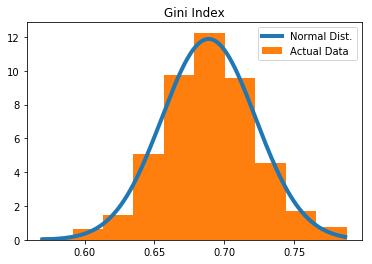

In [35]:
# Transform the Gini index and crime index so they are normal
transform_gini = []
transform_crime = []
for i in range(len(gini)):
    y = gini[i]**(1/2.2)
    k = crimeindex[i]**(1/2.2)
    transform_gini.append(y)
    transform_crime.append(k)

# Test Gini index for normality again
st_gini_transform, p_gini_transform = normaltest(transform_gini)
if p_gini_transform > 0.01:
    print('The Gini index distribution is approximately normal.')
else:
    print('The Gini index distribution is not approximately normal.')

# Test crime index for normality again
st_crime_transform, p_crime_transform = normaltest(transform_crime)
if p_crime_transform > 0.01:
    print('The crime index distribution is approximately normal.')
else:
    print('The crime index distribution is not approximately normal.')

xs = np.arange(min(transform_gini), max(transform_gini), 0.001)
fit = stats.norm.pdf(xs, np.mean(transform_gini), np.std(transform_gini))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(transform_gini, density = True, label = 'Actual Data');
plt.title('Gini Index')
plt.legend();

# Create a new column for the transformed Gini Index 
# and rewrite crime index column
crime_gini_df['TransformedGini'] = transform_gini
crime_gini_df['crime index'] = transform_crime

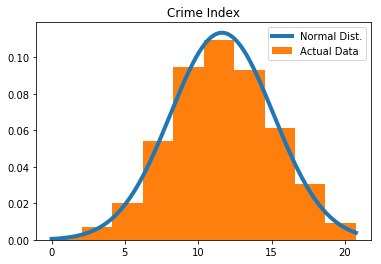

In [36]:
xs1 = np.arange(min(transform_crime), max(transform_crime), 0.001)
fit1 = stats.norm.pdf(xs1, np.mean(transform_crime), np.std(transform_crime))
plt.plot(xs1, fit1, label = 'Normal Dist.', lw = 4)
plt.hist(transform_crime, density = True, label = 'Actual Data');
plt.title('Crime Index')
plt.legend();

Now that the Gini index and crime index are normalized, lets look at how they are related and run some tests. First we create a table of correlation between crime index and Gini index. As we can see, there is a correlation of 0.33 and it is slightly less than the correlation we saw between quintile share and crime index but it is still a weak positive correlation.

In [37]:
# Correlation between crime index and Gini index
corrleation = crime_gini_df[['crime index', 'TransformedGini']].corr()
corrleation

,crime index,TransformedGini
crime index,1.000000,0.329588
TransformedGini,0.329588,1.000000


Similar to how we looked at quintile share and crime index, we want to look at a linear model to see if Gini index significantly can determind crime index. We will use Ordinary Least Squares (OLS) again for our modeling using patsy and statsmodels.

In [38]:
# Rename crime index column to check 
crime_gini_df.rename(columns = {'crime index': 'crimeindex'}, 
                     inplace = True)
outcome, predictors = patsy.dmatrices('crimeindex ~ TransformedGini', 
                                      crime_gini_df)
mod = sm.OLS(outcome, predictors)
# fit the model
res = mod.fit()

lm = bool(res.pvalues[1] < 0.01)
if lm == True:
    print("Gini Index significantly predicts crime index.\n")
else:
    print("Gini Index doesn't significantly predict crime index.\n") 

## look at the results
print(res.summary())

Gini Index significantly predicts crime index.

                            OLS Regression Results                            
Dep. Variable:             crimeindex   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     337.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           3.92e-71
Time:                        20:50:36   Log-Likelihood:                -7246.6
No. Observations:                2768   AIC:                         1.450e+04
Df Residuals:                    2766   BIC:                         1.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

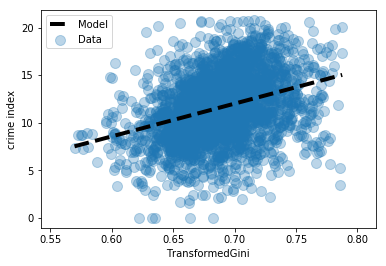

In [39]:
# Plot the orginal data (as before)
plt.scatter(crime_gini_df['TransformedGini'], crime_gini_df['crimeindex'],
            alpha=0.3, label='Data', s=100);

# Generate and plot the model fit line
xs2 = np.linspace(crime_gini_df['TransformedGini'].min(), 
                  crime_gini_df['TransformedGini'].max())
ys2 = (34.4819 * xs2) - 12.1309
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model')

plt.xlabel('TransformedGini')
plt.ylabel('crime index')
plt.legend();
plt.show()

Let's quickly look at how the Gini index is also related to specific types of crimes. As we can see in the correlation table below, there the highest positive correlations besides crime index are with thefts, robberies, and burglaries per 100,000 population. This would make sense in areas with high income inequality that property crimes are also high.

In [40]:
# Find the correlation and section out the transformed gini index value
corr = crime_gini_df.corr()
ginicorr = corr['TransformedGini']
# Sort correlation from highest to lowest and look at the top six values
sortedcorr = ginicorr.sort_values(ascending = False)
sortedcorr.head(6)

TransformedGini         1.000000
Estimate; Gini Index    0.999032
crimeindex              0.329588
theftsper100k           0.288551
robberiesper100k        0.286284
burglariesper100k       0.270550
Name: TransformedGini, dtype: float64

### Summary of Gini Index Analysis

The Gini Index

# Ethics & Privacy

For common problems among ethics and privacy when collecting data, many did not apply to our study, such as informed consent and collection bias, due to fact that we did not use human subjects for our projects and are using public & government datasets. However, ethical issues we may need to consider would include the disclosure of data of minors, for example the perpetrator of a juvenile crime. Perhaps we can use data where crimes of minors are included as long as identities are anonymous or unknown. At first, we considered focusing our project solely on the crimes performed by persons of legal age, thus removing information about minors from our datasets. All of the data sets we have looked at right now are public datasets, so we should be fine as far as permissions are concerned. Any identifying information have already been redacted to maintain confidentiality. If we encounter any data that seems to be a breach of confidentiality, we will follow the Safe Harbour method to remove any personally identifiable information. Using a default ethics checklist to cross-reference possible issues helped us think more abbout who will be affected by our research and what ways we can use to ensure prevention in harming others.

In terms of bias, there could be bias in the crime reporting and data that we are looking at since it is collected by humans. We also have to be aware of the bias and cultural issues around reporting certain crimes such as rape or hate crimes.

For other ethical issues to consider is honest representation of the data and consider if the data we've grabbed from public sources (Kaggle) and the government are always reliable. From checking the source on Kaggle we've implemented, there were listed sources from this scraped code. For crime, it was ICPSR of UMich, and as it is an established university, we're making the assumption that the data is reliable and permission was gathered. The other source is from the US Census Bureau, a public government source.

In terms of whether our research can indirectly harm others and serve as a source for others to profit off of, it's possible that there's always a chance to represent a source incorrectly. Our analysis results could also be used for laws and policies that negatively affect people. However, what we'll do to at least control some of this possibility is to not make outlandish claims from our data and stick with a factual conclusion truly based on what the data is showing. 

References:
- 1) Data Science Ethics Checklist: http://deon.drivendata.org/#default-checklist
- 2) Institute for Social Research: https://www.icpsr.umich.edu/icpsrweb/
- 3) U.S. Census Bureau: https://census.gov/

# Conclusion & Discussion

What we had wanted to answer was whether or not income inequality played a role in crime levels in United States cities. To answer this question, we first gathered data from three sources, which you can read more about in the Datasets section. One dataset observed the number of crimes committed as well as the number of crimes committed per 100,000 persons in the population for each city. Crimes taken into account include murder, rape, robbery, assault, burglary, theft, auto theft, and arson; the dataset included a crime index value for each city reflecting the crimes committed. Another dataset measured each city's Gini index, which is a statistical measure used to gauge economic inequality, measuring income distribution among a population. The remaining dataset read incomes at different percentiles for each city.

For our analysis, we first checked for correlation visually and numerically. To get a better look of the comparison between cities with and without income inequality, we split our data accordingly and first checked if our data was normally distributed. It wasn't, so we transformed our data so that we could apply parametric tests. From there we saw a significant difference in crime index where there was and wasn't income inequality. We then went on to check if poverty had any influence. While the ratio of poverty existing was significantly different between the two, it appears that it does not alter the fact that income inequality has an affect on crime index. Although we found a positive relationship for crime index on income inequality, it's but a weak one, so income inequality should not be a reliable predictor of criminal activity. We ran similar tests against the Gini index to further support our findings.
	
Our project could be biased and inaccurate if our data is affected by biased reporting of criminal activity, government withholding of information, falsified income reportings, and the list goes on. Although we face limitations on what information we could get ahold of and on how accurate the information is, based on what we gathered, we have concluded that there is indeed a positive relationship between the two-- that crime index does in fact seem to increase with income inequality. Can we say that income inequality directly causes crime though? Probably not, as there could be many environmental or political factors to consider. From our analysis, we actually saw that more cities in areas without income inequality experience poverty, yet this did not affect crime being significantly affected by income inequality. Our findings could possibly influence the public to stop connecting criminal activity to general poorness. A less wealthy neighborhood doesn't necessarily mean more crimes are bound to occur. Rather, society might see that crimes occur more often in areas where the rich are much richer than the poor are poor, or in other words, areas where income inequality is undeniably evident.